In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"H:\My Drive\ML\ML datasources\red-wine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [8]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [9]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

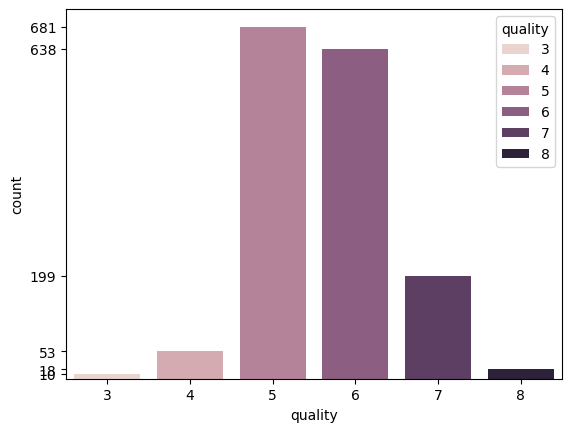

In [42]:
sns.countplot(data=df,x='quality',hue='quality')
plt.yticks(df['quality'].value_counts())
plt.show()

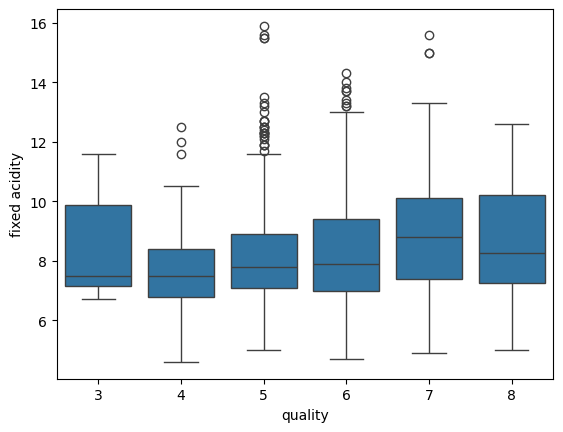

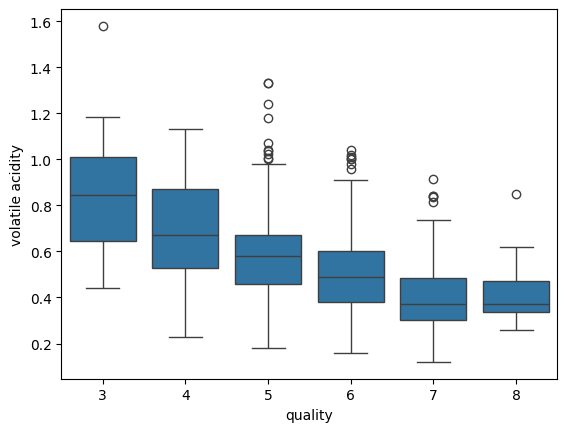

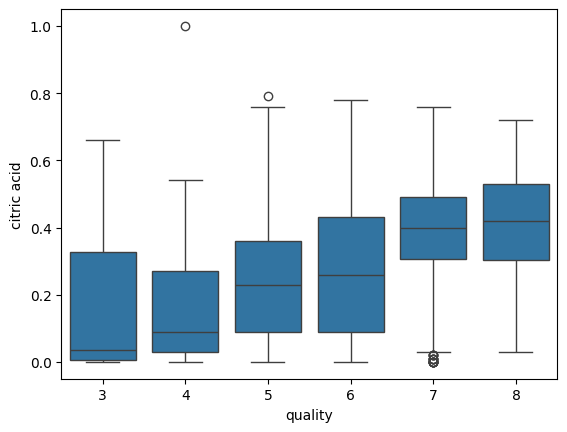

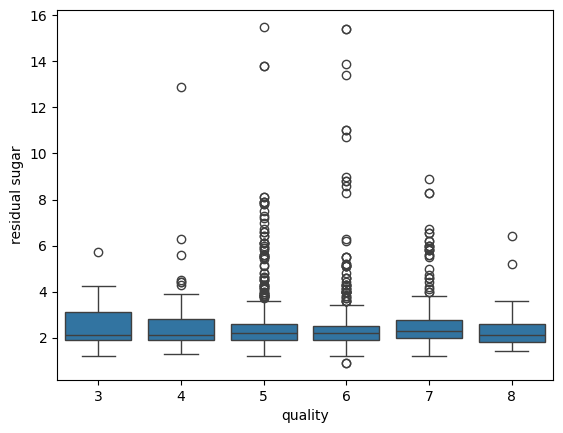

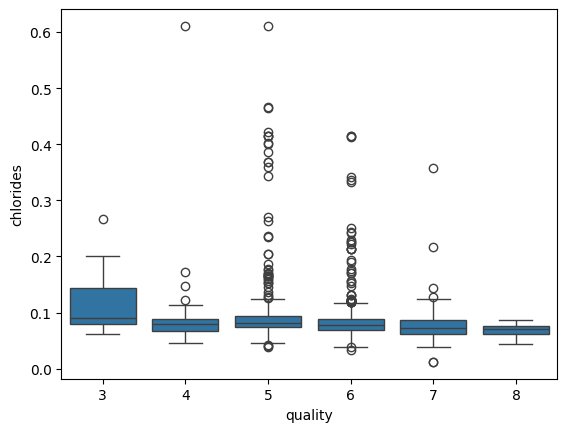

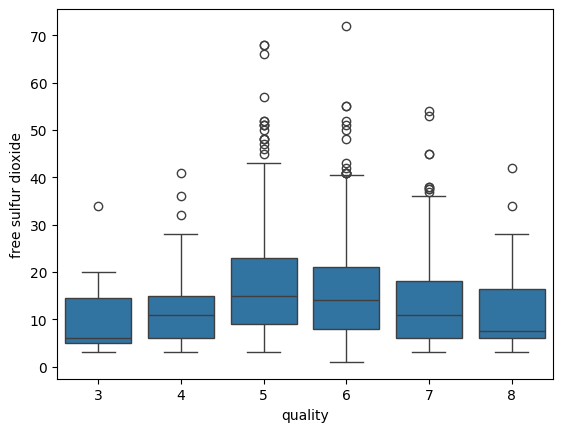

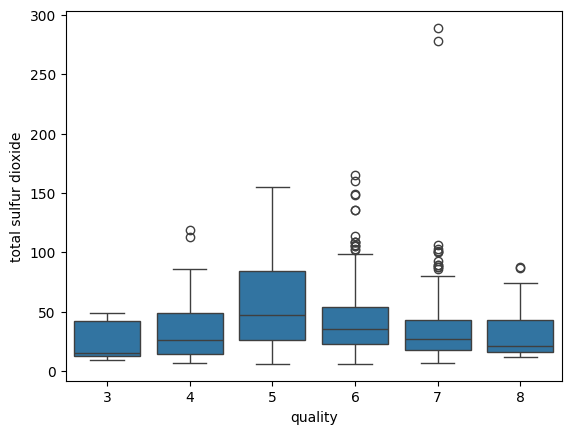

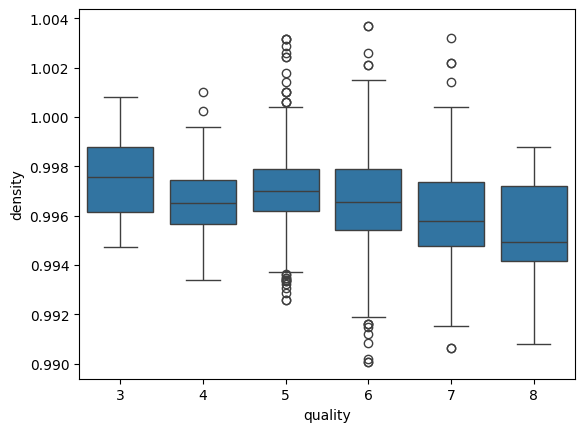

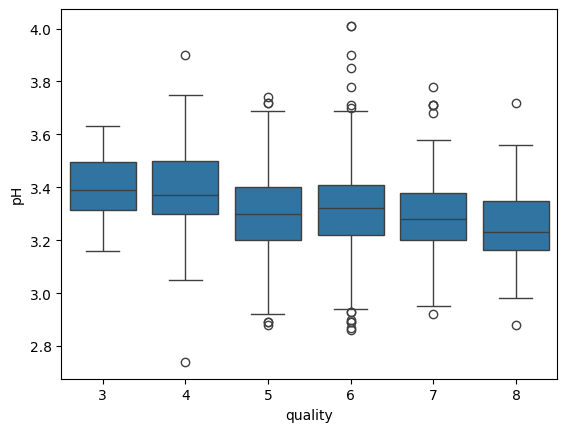

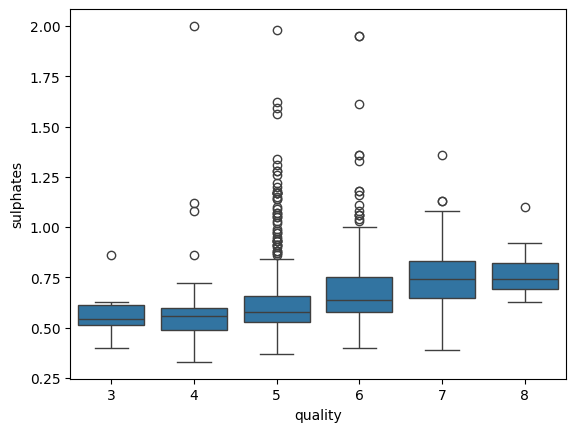

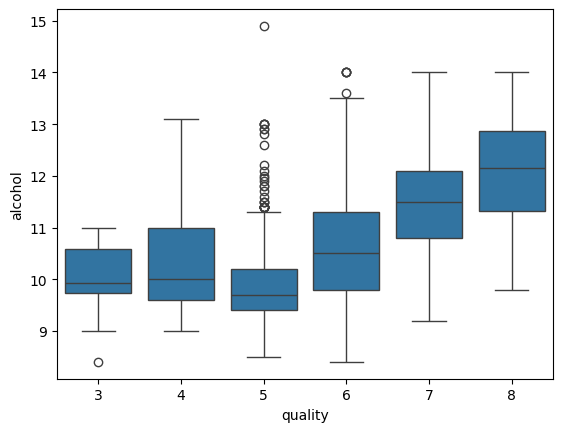

In [43]:
for col in X:
    plt.figure()
    sns.boxplot(data=df,x='quality',y=col)
    plt.show()

In [44]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


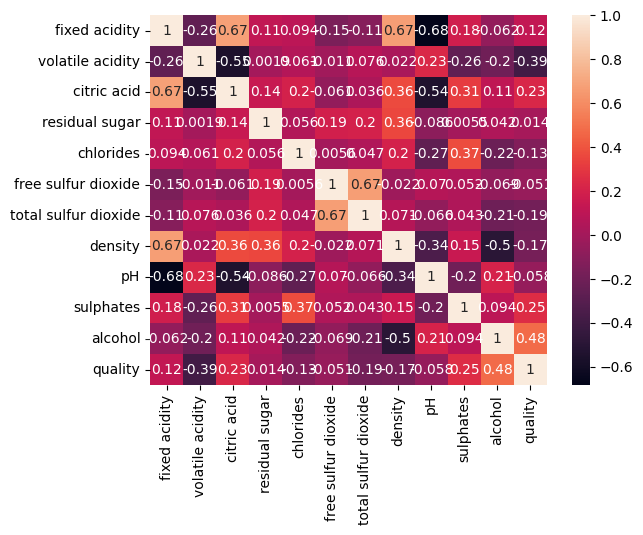

In [45]:
sns.heatmap(df.corr(),annot=True)
plt.show()


In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [14]:
y_test

75      5
1283    6
408     6
1281    6
1118    6
       ..
1596    6
985     6
671     5
1379    6
1169    6
Name: quality, Length: 480, dtype: int64

In [17]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
dt.score(x_train,y_train)

1.0

In [19]:
dt.score(x_test,y_test)

0.6041666666666666

In [20]:
y_pred=dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.07      0.05      0.06        21
           5       0.67      0.70      0.68       207
           6       0.65      0.57      0.61       195
           7       0.46      0.60      0.52        52
           8       0.25      0.33      0.29         3

    accuracy                           0.60       480
   macro avg       0.35      0.38      0.36       480
weighted avg       0.61      0.60      0.60       480



In [52]:
#as model is overfit, we reduce complexity or remove feature ,it is achive by pruning
#Pruning: It removes unwanted feature or reduce depth of Decision tree

In [21]:
#entropy
dt1=DecisionTreeClassifier(criterion='entropy')

In [22]:
#training model
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
#testing model
ypred1=dt1.predict(x_test)
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.10      0.05      0.06        21
           5       0.71      0.74      0.72       207
           6       0.58      0.55      0.56       195
           7       0.37      0.46      0.41        52
           8       0.25      0.33      0.29         3

    accuracy                           0.60       480
   macro avg       0.33      0.36      0.34       480
weighted avg       0.59      0.60      0.59       480



In [56]:
#Depth of model1
dt1.get_depth()

18

In [30]:
#creating a model with reduced depth
dt2=DecisionTreeClassifier(max_depth=7)  # not good accuracy, so change it from 15 to 8
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [31]:
#predicting o/p
ypred2=dt2.predict(x_test)
print(classification_report(y_test,ypred2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.20      0.05      0.08        21
           5       0.64      0.71      0.67       207
           6       0.58      0.57      0.57       195
           7       0.48      0.44      0.46        52
           8       0.00      0.00      0.00         3

    accuracy                           0.59       480
   macro avg       0.32      0.29      0.30       480
weighted avg       0.57      0.59      0.58       480



In [32]:
dt2.get_depth()

7

In [59]:
# As accuracy is not increasing by pruning method, we can create new model using min sampling method
#Min sample methode may reduce score but can give more accuracy

In [40]:
dt3=DecisionTreeClassifier(min_samples_leaf=8)

In [41]:
dt3.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=8)

In [42]:
#predicting o/p
ypred3=dt3.predict(x_test)
print(classification_report(y_test,ypred3))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.63      0.71      0.67       207
           6       0.54      0.56      0.55       195
           7       0.44      0.37      0.40        52
           8       0.00      0.00      0.00         3

    accuracy                           0.57       480
   macro avg       0.27      0.27      0.27       480
weighted avg       0.54      0.57      0.56       480



In [37]:
#no improvement in accuracy by changing sample/model/depth.Decision Tree is not fit for dataset/model

Random forest:
1.It is ensembled technique(group of element viewed as whole rather than considering individual)
2.Both regression and classification
3.It create small samples from data, create multiple decision tree,predict o/p and return back to dataset
4.Majority o/p from small samples is the final o/p of random forest
5.This technique is called as Bootstraping/aggregation

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf=RandomForestClassifier(n_estimators=70,max_depth=15,max_features=8)
#n_estimators:no of decision trees, max_depth-->max depth of each decisison tree

In [46]:
#training model
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, max_features=8, n_estimators=70)

In [47]:
#testing model
ypredf=rf.predict(x_test)
print(classification_report(y_test,ypredf))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.05      0.09        21
           5       0.70      0.81      0.75       207
           6       0.67      0.66      0.67       195
           7       0.57      0.50      0.53        52
           8       0.50      0.33      0.40         3

    accuracy                           0.68       480
   macro avg       0.57      0.39      0.41       480
weighted avg       0.68      0.68      0.66       480



In [49]:
# accuarcy is not yet achived. restrict no of feture
rf1=RandomForestClassifier(n_estimators=75,max_depth=18,max_features=8)

In [50]:
#training model
rf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=18, max_features=8, n_estimators=75)

In [52]:
#testing model
ypredf1=rf1.predict(x_test)
print(classification_report(y_test,ypredf1))  # accuracy is still same

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.71      0.81      0.76       207
           6       0.67      0.69      0.68       195
           7       0.57      0.46      0.51        52
           8       0.50      0.33      0.40         3

    accuracy                           0.68       480
   macro avg       0.41      0.38      0.39       480
weighted avg       0.64      0.68      0.66       480



In [53]:
#converting multi class data to binary class data(its has 3,4,5,6,7,8 qualities). As accuracy is reducing,model is not accurate
#consider 3,4,5 as bad quality(0). 6,7,8 good quality(1)
#creating a new column called binary quality
#If quality is > 5 we make it 1, if quality<5 we make it 0
def multi_to_binary(n):
    if n>5:
        return 1
    else:
        return 0

In [56]:
multi_to_binary(8)  # testing function

1

In [71]:
df['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [57]:
df['quality_bin']=df['quality'].apply(multi_to_binary)  # vectorization

In [59]:
df['quality_bin'].value_counts()

quality_bin
1    855
0    744
Name: count, dtype: int64

In [60]:
#feature target selection
X=df.drop(['quality','quality_bin'],axis=1) #feature
y=df['quality_bin']

In [61]:
#train test split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)

In [62]:
#RF model and training same
rf=RandomForestClassifier(n_estimators=75)
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=75)

In [63]:
#testing
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       230
           1       0.82      0.81      0.82       250

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480



Conclusion: We have achived tbe accuracy as 81% from 57 % using Random forest algorithm